___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [645]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

from sklearn.cluster import KMeans

#### Load Dataset

In [646]:
df = pd.read_csv("Mall_Customers.csv")
df.head()
# label olmadığına dikkat edelim.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [647]:
df = df.rename(columns={'CustomerID': 'id',
                        'Gender': 'gender',
                        'Age': 'age',
                        'Annual Income (k$)': 'income', 
                        'Spending Score (1-100)': 'score'})

In [648]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df0 = df.copy()
df.drop(columns=['gender'],inplace=True)

In [649]:
df.head()

,id,age,income,score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      200 non-null    int64
 1   age     200 non-null    int64
 2   income  200 non-null    int64
 3   score   200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


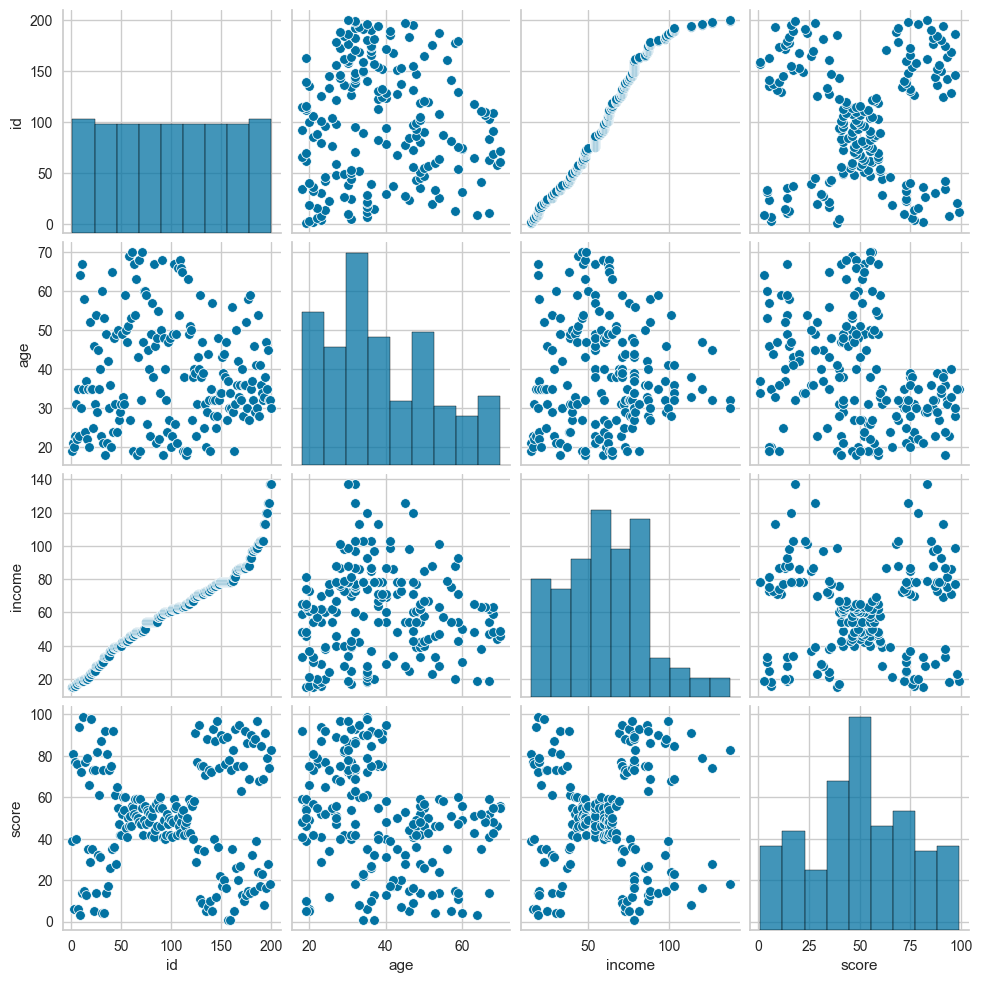

In [458]:
sns.pairplot(df)

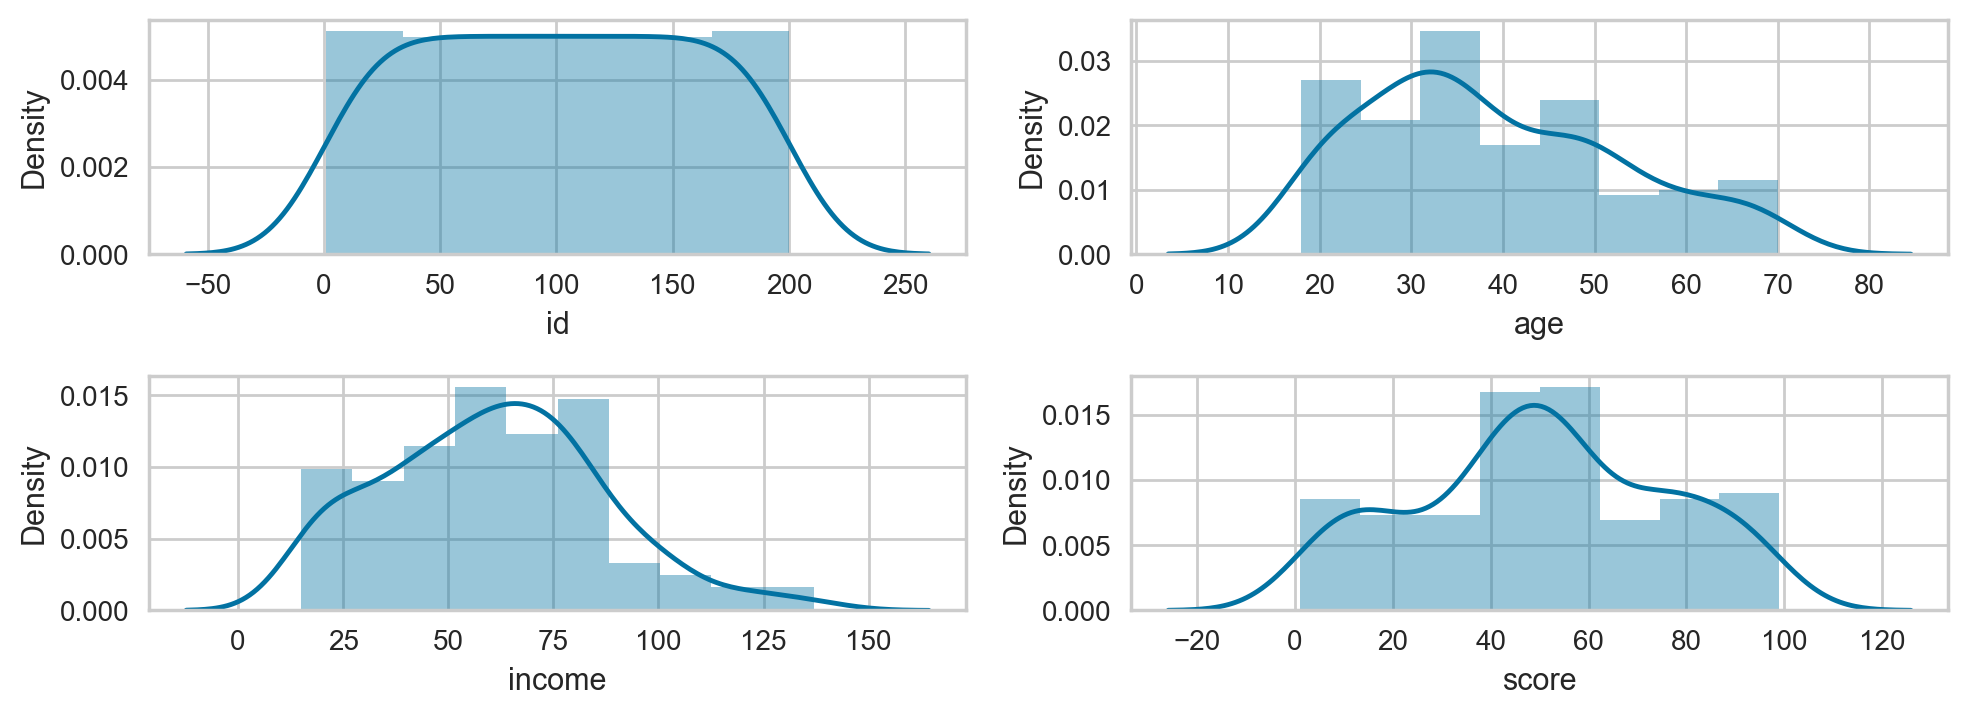

In [459]:
# Distribution of the numericalfeatures

fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns):
        plt.subplot(8,2,i+1)
        sns.distplot(df[col])
plt.tight_layout();

In [650]:
df.shape

(200, 4)

In [651]:
df.drop(columns=['id'], inplace = True)

In [652]:
df.shape

(200, 3)

In [653]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

## Hopkins test

In [465]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


# normalde bu fonksiyonumuz  pyclustertend'ın hopkins kütüphanesinde var.Ancak oluşabilecek hatalara karşı 
# doğrudan fonksiyonun kendisini kullanacağız . Bundan dolayı pyclustertend'ı install etmemize gerek yoktur! 
                                                #!pip install pyclustertend --user
                                                # from pyclustertend import hopkins

In [466]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [467]:
# hopkins without scaler
hopkins(df, df.shape[0])

0.3218821973289903

In [468]:
# hopkins with scaler
hopkins(StandardScaler().fit_transform(df), df.shape[0])

0.3131827523100046

In [469]:
hopkins(MinMaxScaler().fit_transform(df), df.shape[0])
# I will go with MinMaxScaler

0.30938456274857623

In [470]:
# hopkins 0'a yaklaşıkça datam kümelemeye yatkın diyebiliriz.Datam çok büyük olsaydı,X.shape[0] yerine
# buraya bir  sampling_size da belirtebilirdik.
# her çalıştırıldığında farklı sonuç çıkmasının nedeni; arka planda X'den rastgele gözlemler almasıdır.

In [471]:
scaler = MinMaxScaler()

In [472]:
df_scaled = scaler.fit_transform(df)

In [473]:
X0 = pd.DataFrame(df_scaled, columns =df.columns)
X0

,age,income,score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [474]:
X2 = X0.drop(columns =['income']).copy()

In [475]:
X2.head()

,age,score
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959


In [476]:
X2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.0,0.400962,0.268635,0.0,0.206731,0.346154,0.596154,1.0
score,200.0,0.502041,0.263505,0.0,0.344388,0.500000,0.734694,1.0


In [477]:
hopkins(X2, X2.shape[0])

0.2943709559399801

#### *ii. Determine optimal number of clusters*

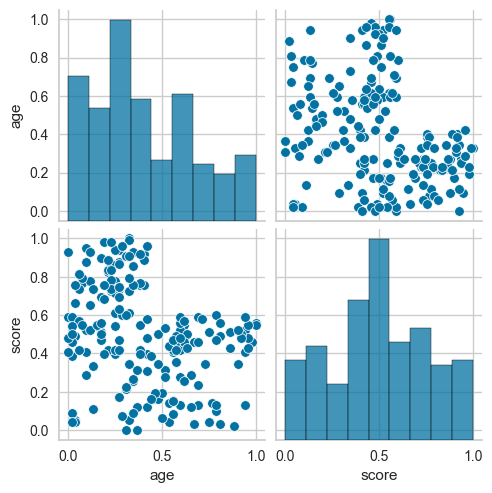

In [478]:
sns.pairplot(X2)
plt.show()
# 3 veya 4 cluster var gibi gozukuyor

##### Elbow metod

In [479]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, 
                   random_state=42)
    model.fit(X2)
    ssd.append(model.inertia_)

# range'i 2'den başlattığımıza dikkat edelim eğer 1'den başlatırsak elbow'dan optimal k olarak hep 2'yi görürüz.
# inertia  kümelerdeki gözlemlerin centroidlerini  ne sıklıkta çevrelediğini hesaplar.
# inertia'nın sadece küme içine odaklandığına dikkat edelim.
# inertia ne kadar küçükse kümeler kendi içerisinde  centroidlerini o kadar iyi çevrelemiştir.

Text(0.5, 1.0, 'elbow method')

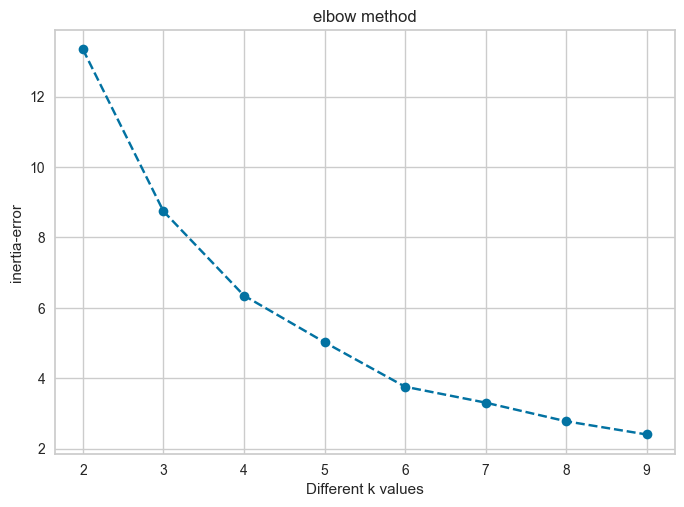

In [480]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [481]:
# elbow methodu inertia üzerinden hareket eder diğer kümelerle olan uzaklığa bakmaz.
# elbow method'una göre sert düşüşün durduğu "ilk" nokta optimal k'dır.bazı datalarda 2-3 tane sert düşüş olabilir.
# inertia'nın en minimum olduğu nokta demek gözlem sayısı kadar küme demektir bu da clustering'in mantığına aykırı.
# range(2,150) yaparak bunu gözlemleyebilirsiniz.

In [482]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,4.595648
3,2.391796
4,1.324103
5,1.263347
6,0.452351
7,0.528894
8,0.374916


<Axes: >

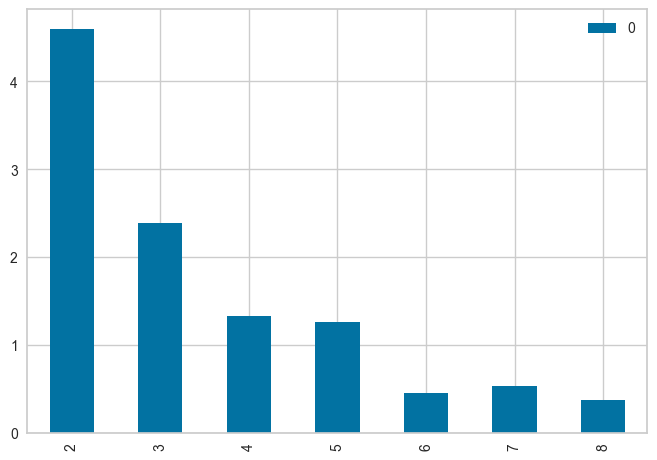

In [483]:
import plotly.express as px

# Create a bar plot using plotly express
# fig = px.bar(df_diff[1:])
# fig.show()

df_diff[1:].plot(kind='bar')


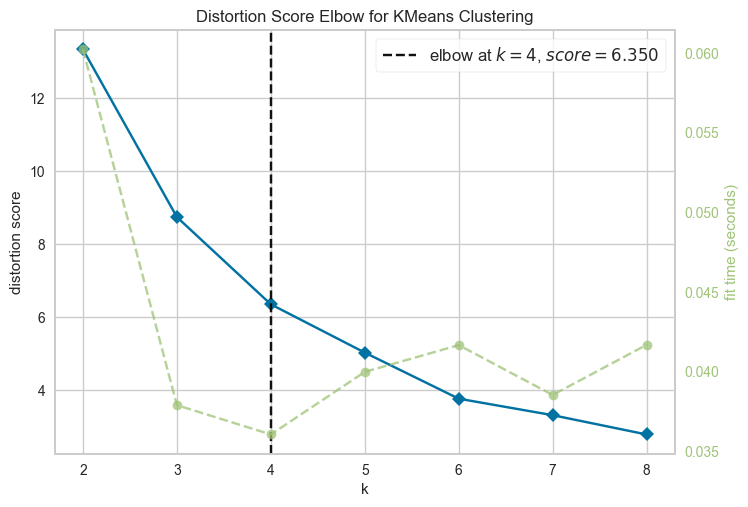

In [484]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.poof();

# yellowbrick sert düşüşün durduğu ilk noktayı değil anlamlı bir düşüşün durduğu noktayı dikkate alarak bir tavsiye de bulunur.

In [485]:
# scatterplot'a göre optimal k 3 veya 4,
# elbow da optimal k 4 veya 6, 
# yellowbrickte optimal k yi 4 olarak onerdi.

# elbow method inertia'yı dikkate alarak çalışıyor. ideal kümelemede kümeler arası mesafede onemlidir. Bu nedenle, Silhouette analizi yaparak optimal k için bir tane daha tavsiye alacağız.

##### Silhouette Score

In [486]:
from sklearn.metrics import silhouette_score
# silhouette_score ; yaptığımız kümelemenin kalitesini ölçen bir metriktir, inertia her küme kendi içerisinde centroidi  
# etrafında ne sıklıkta kümelenmiş bunu ölçüyor ( küme içi mesafelere bakıyor yani) Ama bizim ideal clusteringten anlamamız
# gereken bir de  maximal inter cluster distance idi  ve silhouette_score işte bu durumu  hesaba katıyor.

In [487]:
K_means_model = KMeans(n_clusters=3, random_state=42)
K_means_model.fit(X2)

KMeans(n_clusters=3, random_state=42)

In [488]:
silhouette_score(X2, K_means_model.labels_)
# silhouette_score 1'e ne kadar yakınsa kümelemem o kadar kalitelidir.

0.44058221683010546

In [489]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, 
                    random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.47252865228696783
For n_clusters=3, the silhouette score is 0.44058221683010546
For n_clusters=4, the silhouette score is 0.42882713071959183
For n_clusters=5, the silhouette score is 0.44625330587100703
For n_clusters=6, the silhouette score is 0.45615225386265235
For n_clusters=7, the silhouette score is 0.40578335793980236
For n_clusters=8, the silhouette score is 0.4169908111029726


In [490]:
# n_clusters=2 'de silhouette score en yuksek. ancak inertia cok yuksek
# n_clusters=3 ve 5 ikinci en yuksek skorlar. 
# 3 olabilir 4 te olabilir
# Bu durumda, hesaplanan silhouette skoru, tüm gözlemlerin ortalamasıdır (kümeler bazında).

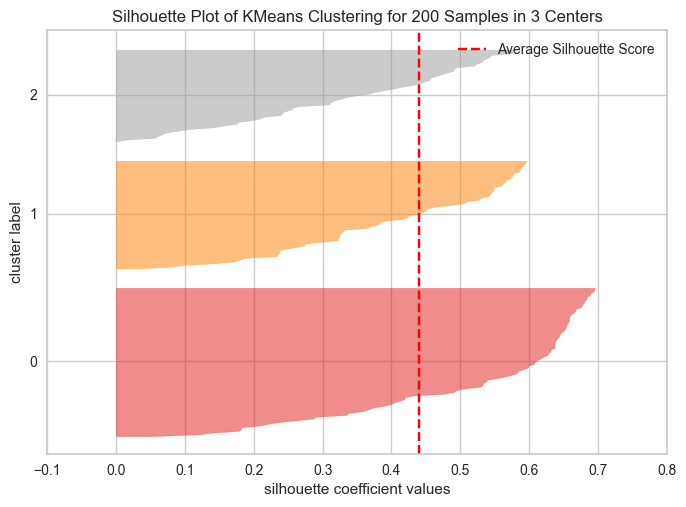

In [491]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, 
                random_state=42)          # n_clusters=3'e karar verdik !
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

# yellowbrick'in bu özelliğiyle bir her bir cluster'ın ayrı ayrı silhouette score'larını görebiliyoruz.
# y ekseni her bir gozlemin silhette skoru

In [492]:
#model3.n_clusters
for i in range(3):
    label = (model3.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5297651438925997
mean silhouette score for label 1    : 0.40917535941864
mean silhouette score for label 2    : 0.33429309153197057
mean silhouette score for all labels : 0.44058221683010546


#### *iii. Apply K Means*

In [493]:
model = KMeans(n_clusters=3, random_state=42)  
clusters = model.fit_predict(X2)
clusters

array([2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [494]:
X2["clusters"] = clusters
X2.head()

,age,score,clusters
0,0.019231,0.387755,2
1,0.057692,0.816327,0
2,0.038462,0.051020,2
3,0.096154,0.775510,0
4,0.250000,0.397959,2


<Figure size 2000x1000 with 0 Axes>

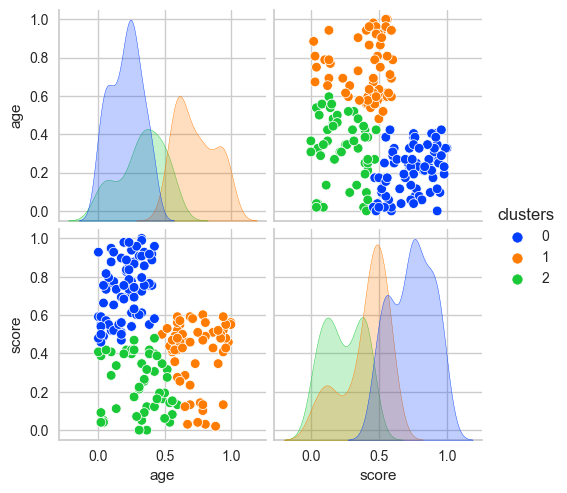

In [495]:
plt.figure(figsize=(20,10))
sns.pairplot(X2, hue="clusters", palette="bright");
# 3kumelemede skor ayirici bir ozellik ama age degil.

In [496]:
clus_pred = X2.groupby("clusters").mean().T
clus_pred
# her clastır için her featuran ortalama değerlerini alıp bu değerler üzerinden featurların biribirylr girift olup olmadığını
# tespit etmeye çalışacağız.

clusters,0,1,2
age,0.205656,0.732320,0.326560
score,0.739616,0.401086,0.239122


<Axes: >

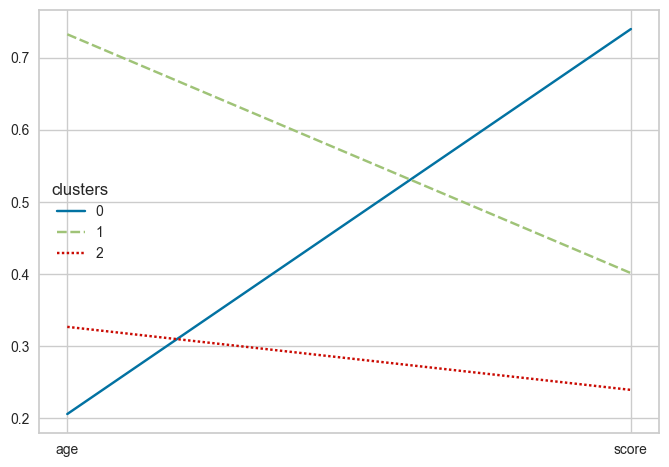

In [497]:
sns.lineplot(data=clus_pred)

## en iyi ayrışımın olduğu ve hangi featurelarda datam giriftleşiyor onu görmek için çiziyoruz bu lineplot'u.

<Axes: xlabel='clusters', ylabel='score'>

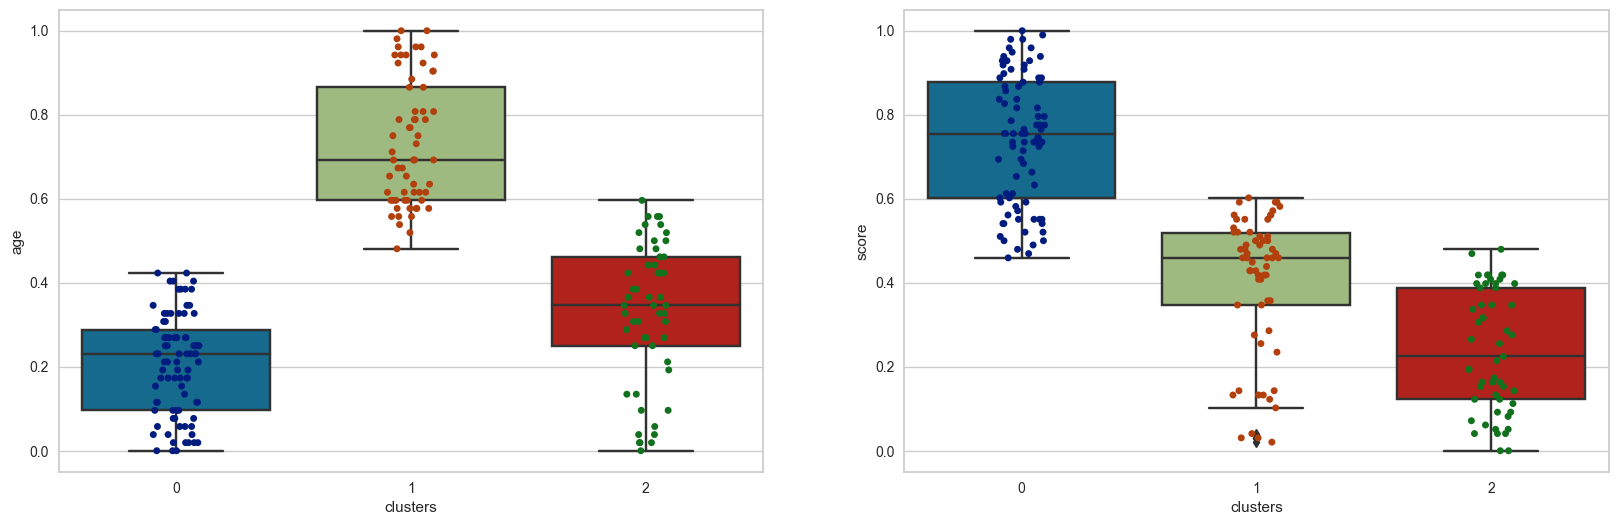

In [498]:
plt.figure(figsize = (20,6))

plt.subplot(121)
sns.boxplot(y="age", x="clusters", data=X2)
sns.stripplot(y="age", x="clusters", data=X2, palette="dark")

plt.subplot(122)
sns.boxplot(y="score", x="clusters", data=X2)
sns.stripplot(y="score", x="clusters", data=X2, palette="dark")

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [499]:
X3 = X0.drop(columns =['age']).copy()

In [500]:
X3.head()

,income,score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [501]:
X3.describe().T
# std > mean durumu yok

,count,mean,std,min,25%,50%,75%,max
income,200.0,0.373443,0.215285,0.0,0.217213,0.381148,0.516393,1.0
score,200.0,0.502041,0.263505,0.0,0.344388,0.500000,0.734694,1.0


In [502]:
hopkins(X3, X3.shape[0])

0.30446657871237515

#### *ii. Determine optimal number of clusters*

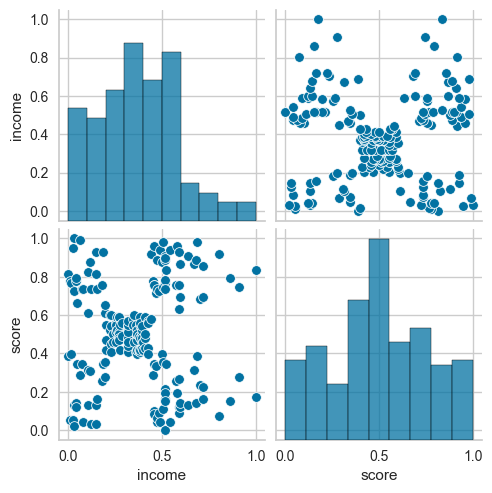

In [503]:
sns.pairplot(X3)
plt.show()
# 5 cluster var gibi gozukuyor

##### Elbow metod

In [504]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, 
                   random_state=42)
    model.fit(X3)
    ssd.append(model.inertia_)

# range'i 2'den başlattığımıza dikkat edelim eğer 1'den başlatırsak elbow'dan optimal k olarak hep 2'yi görürüz.
# inertia  kümelerdeki gözlemlerin centroidlerini  ne sıklıkta çevrelediğini hesaplar.
# inertia'nın sadece küme içine odaklandığına dikkat edelim.
# inertia ne kadar küçükse kümeler kendi içerisinde  centroidlerini o kadar iyi çevrelemiştir.

Text(0.5, 1.0, 'elbow method')

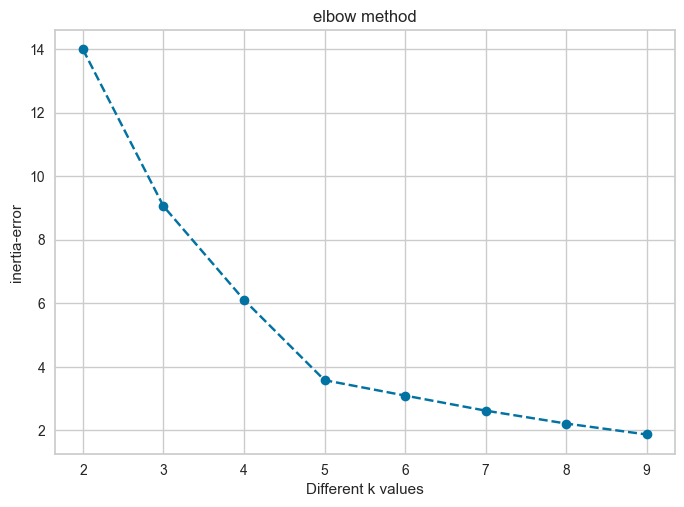

In [505]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
# 5 gibi gozukuyor.

In [506]:
# elbow methodu inertia üzerinden hareket eder diğer kümelerle olan uzaklığa bakmaz.
# elbow method'una göre sert düşüşün durduğu "ilk" nokta optimal k'dır.bazı datalarda 2-3 tane sert düşüş olabilir.
# inertia'nın en minimum olduğu nokta demek gözlem sayısı kadar küme demektir bu da clustering'in mantığına aykırı.
# range(2,150) yaparak bunu gözlemleyebilirsiniz.

In [507]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,4.934520
3,2.948673
4,2.527194
5,0.484733
6,0.474281
7,0.406047
8,0.344623


<Axes: >

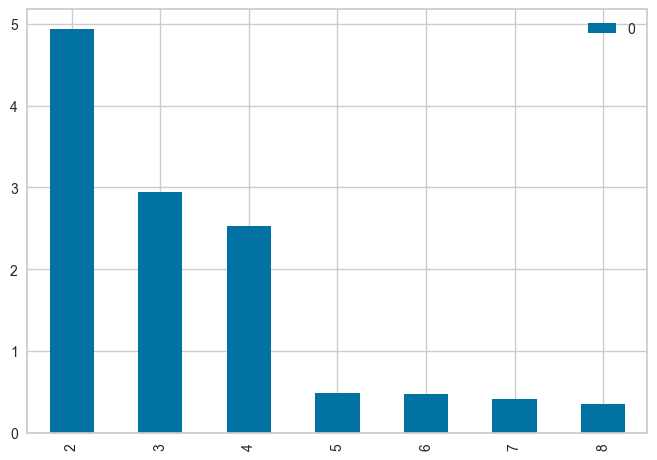

In [508]:
import plotly.express as px

# Create a bar plot using plotly express
# fig = px.bar(df_diff[1:])
# fig.show()

df_diff[1:].plot(kind='bar')
# 5 gibi gozukuyor.


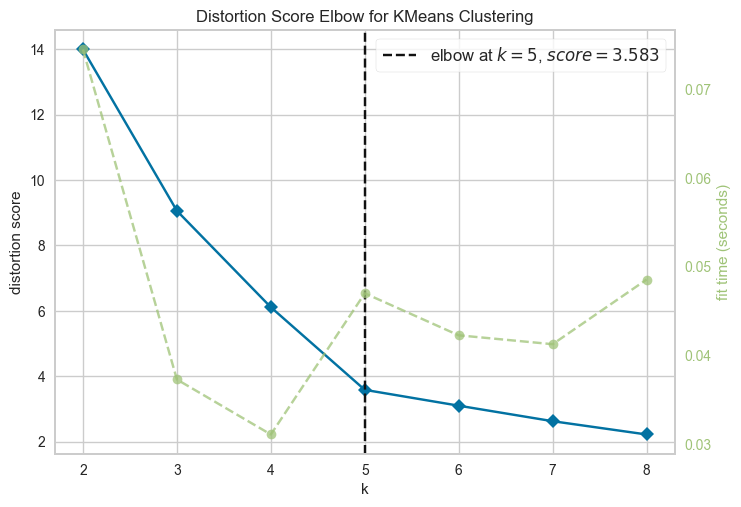

In [509]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X3)        # Fit the data to the visualizer
visualizer.poof();

# yellowbrick sert düşüşün durduğu ilk noktayı değil anlamlı bir düşüşün durduğu noktayı dikkate alarak bir tavsiye de bulunur.

In [510]:
# scatterplot'a göre optimal k 5,
# elbow da optimal k 5, 
# yellowbrickte optimal k yi 5 olarak onerdi.

# elbow method inertia'yı dikkate alarak çalışıyor. ideal kümelemede kümeler arası mesafede onemlidir. Bu nedenle, Silhouette analizi yaparak optimal k için bir tane daha tavsiye alacağız.

##### Silhouette Score

In [511]:
from sklearn.metrics import silhouette_score
# silhouette_score ; yaptığımız kümelemenin kalitesini ölçen bir metriktir, inertia her küme kendi içerisinde centroidi  
# etrafında ne sıklıkta kümelenmiş bunu ölçüyor ( küme içi mesafelere bakıyor yani) Ama bizim ideal clusteringten anlamamız
# gereken bir de  maximal inter cluster distance idi  ve silhouette_score işte bu durumu  hesaba katıyor.

In [512]:
K_means_model = KMeans(n_clusters=5, random_state=42)
K_means_model.fit(X3)

KMeans(n_clusters=5, random_state=42)

In [513]:
silhouette_score(X3, K_means_model.labels_)
# silhouette_score 1'e ne kadar yakınsa kümelemem o kadar kalitelidir.

0.5594854531227246

In [514]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, 
                    random_state=42)
    kmeans.fit(X3)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.33340205479521
For n_clusters=3, the silhouette score is 0.4514909309424474
For n_clusters=4, the silhouette score is 0.49620078745146784
For n_clusters=5, the silhouette score is 0.5594854531227246
For n_clusters=6, the silhouette score is 0.5377658512956012
For n_clusters=7, the silhouette score is 0.5187916611768829
For n_clusters=8, the silhouette score is 0.43038461857643606


In [515]:
# hem inertia degeri hem silhoette skoru dikkate alindiginda 5 kume var.
# Bu durumda, hesaplanan silhouette skoru, tüm gözlemlerin ortalamasıdır (kümeler bazında).

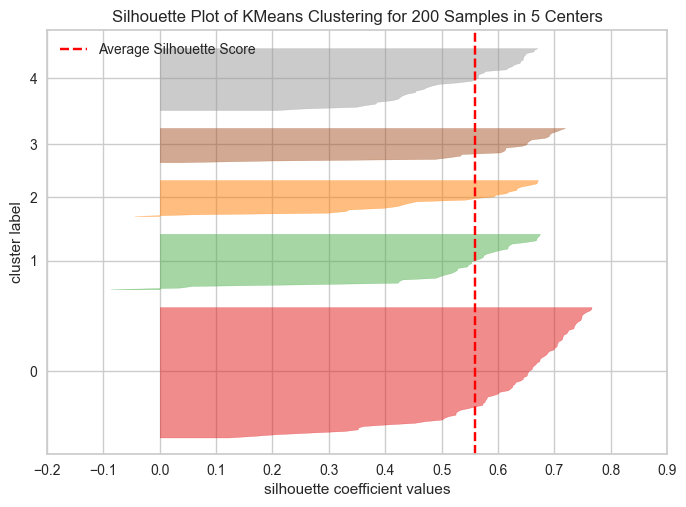

In [516]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model5 = KMeans(n_clusters=5, 
                random_state=42)          # n_clusters=5'e karar verdik !
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X3)    # Fit the data to the visualizer
visualizer.poof();

# yellowbrick'in bu özelliğiyle bir her bir cluster'ın ayrı ayrı silhouette score'larını görebiliyoruz.
# y ekseni her bir gozlemin silhette skoru

In [517]:
#model3.n_clusters
for i in range(5):
    label = (model5.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.6119010983052857
mean silhouette score for label 1    : 0.5100676264333632
mean silhouette score for label 2    : 0.4877449175242944
mean silhouette score for label 3    : 0.585932908834499
mean silhouette score for label 4    : 0.522360965108495
mean silhouette score for all labels : 0.5594854531227246


#### *iii. Apply K Means*

In [518]:
model = KMeans(n_clusters=5, random_state=42)  
clusters = model.fit_predict(X3)
clusters

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [519]:
X3["clusters"] = clusters
X3.head()

,income,score,clusters
0,0.000000,0.387755,2
1,0.000000,0.816327,3
2,0.008197,0.051020,2
3,0.008197,0.775510,3
4,0.016393,0.397959,2


<Figure size 2000x1000 with 0 Axes>

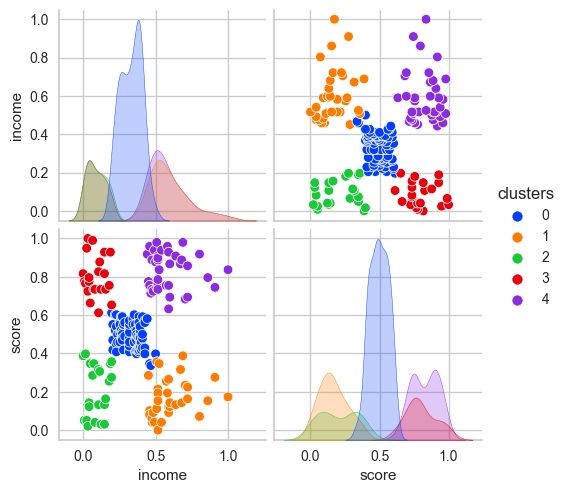

In [520]:
plt.figure(figsize=(20,10))
sns.pairplot(X3, hue="clusters", palette="bright");

In [521]:
clus_pred = X3.groupby("clusters").mean().T
clus_pred
# her clastır için her featuran ortalama değerlerini alıp bu değerler üzerinden featurların biribirylr girift olup olmadığını
# tespit etmeye çalışacağız.

clusters,0,1,2,3,4
income,0.330298,0.600000,0.092659,0.087928,0.586381
score,0.495087,0.164431,0.203194,0.799629,0.827839


<Axes: >

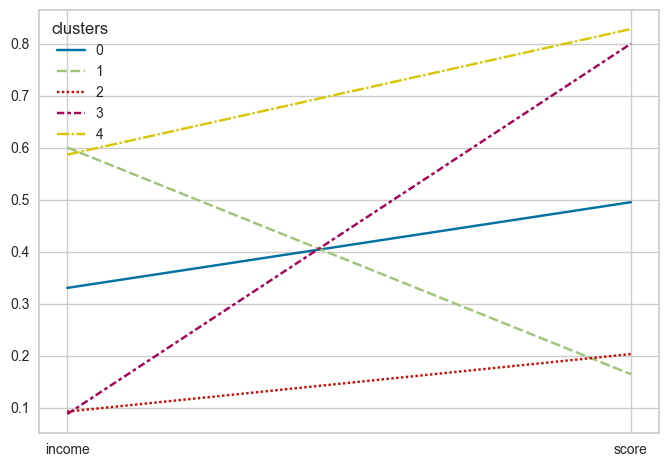

In [522]:
sns.lineplot(data=clus_pred)

## en iyi ayrışımın olduğu ve hangi featurelarda datam giriftleşiyor onu görmek için çiziyoruz bu lineplot'u.

<Axes: xlabel='clusters', ylabel='score'>

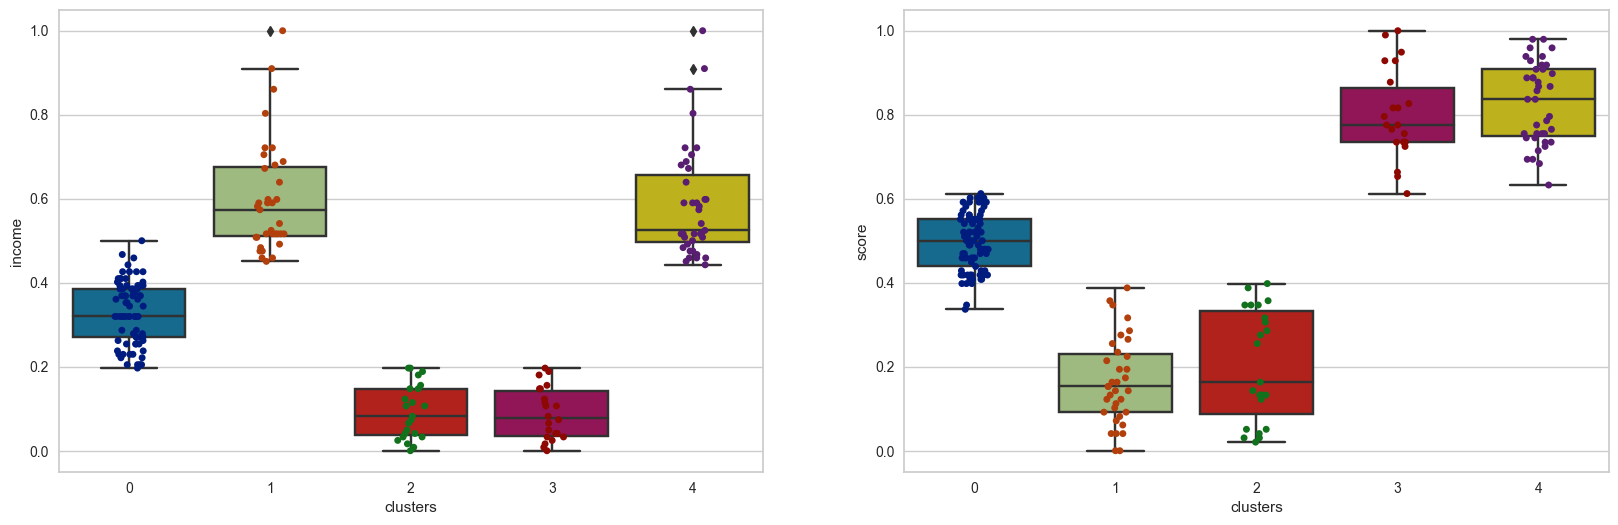

In [523]:
plt.figure(figsize = (20,6))

plt.subplot(121)
sns.boxplot(y="income", x="clusters", data=X3)
sns.stripplot(y="income", x="clusters", data=X3, palette="dark")

plt.subplot(122)
sns.boxplot(y="score", x="clusters", data=X3)
sns.stripplot(y="score", x="clusters", data=X3, palette="dark")

# Hierarchical Clustering

In [534]:
X2.drop(columns=['clusters'], inplace = True)

In [536]:
X3.drop(columns=['clusters'], inplace = True)
X3

,income,score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [538]:
X2.head()

,age,score
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959


In [537]:
hopkins(X2, X2.shape[0]) 
# 0.5 alti kumelemeye yatkin

0.2823177568021886

In [540]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [542]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

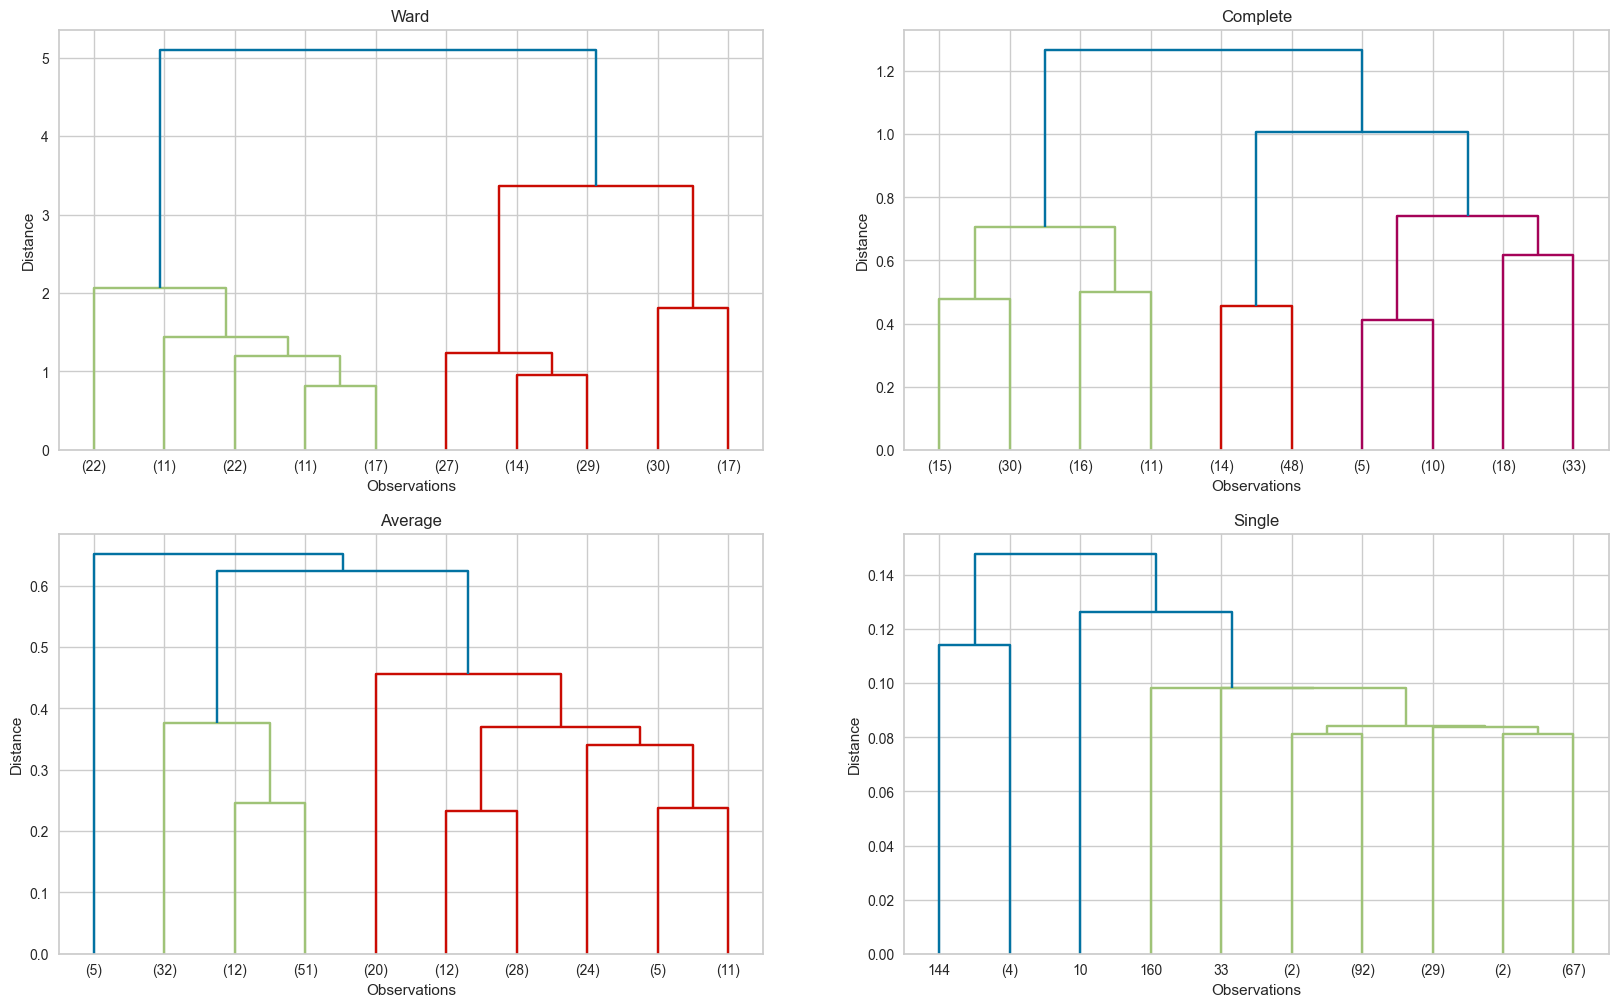

In [543]:
# dendograma vermek üzere datamızı ve mesafelerin neye göre ölçüleceği bilgisini linkage fonksiyonuna veriyoruz.
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

# truncate_mode='lastp' ve p=10 ayarlanarak dendogramın sadece son 10 kümeyi bize gösterecek şekilde sadeleştirme yapması
# sağlanır.

# 2 kume 1,6 birim
# 3 kume 1,5 birim

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distance

In [551]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters. 
- a :The mean distance between a sample and all other points in the same class.
  b: The mean distance between a sample and all other points in the next nearest cluster.

s = (b-a) / max(a,b)

In [552]:
from sklearn.metrics import silhouette_score

In [553]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

# cluster 2 veya 3 olabilir.
# burada hesaplanan silhouette score bütün gözlemlerin ortalamasıdır (clusterlara göre)

Silhouette Score for 2 clusters: 0.41699937625242867
Silhouette Score for 3 clusters: 0.417124576652748
Silhouette Score for 4 clusters: 0.3898644314748176
Silhouette Score for 5 clusters: 0.37668241046330797
Silhouette Score for 6 clusters: 0.39920932010291066
Silhouette Score for 7 clusters: 0.3589298217276204
Silhouette Score for 8 clusters: 0.3611306861915168
Silhouette Score for 9 clusters: 0.3657953810746083


### Clustering based on Annual Income and Spending Score- x2

In [565]:
X3.head()

,income,score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [566]:
hopkins(X3, X3.shape[0]) 
# 0.5 alti kumelemeye yatkin

0.2951208827023264

In [567]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [568]:
hc_ward = linkage(y = X3, method = "ward")
hc_complete = linkage(X3, "complete")
hc_average = linkage(X3, "average")
hc_single = linkage(X3, "single")

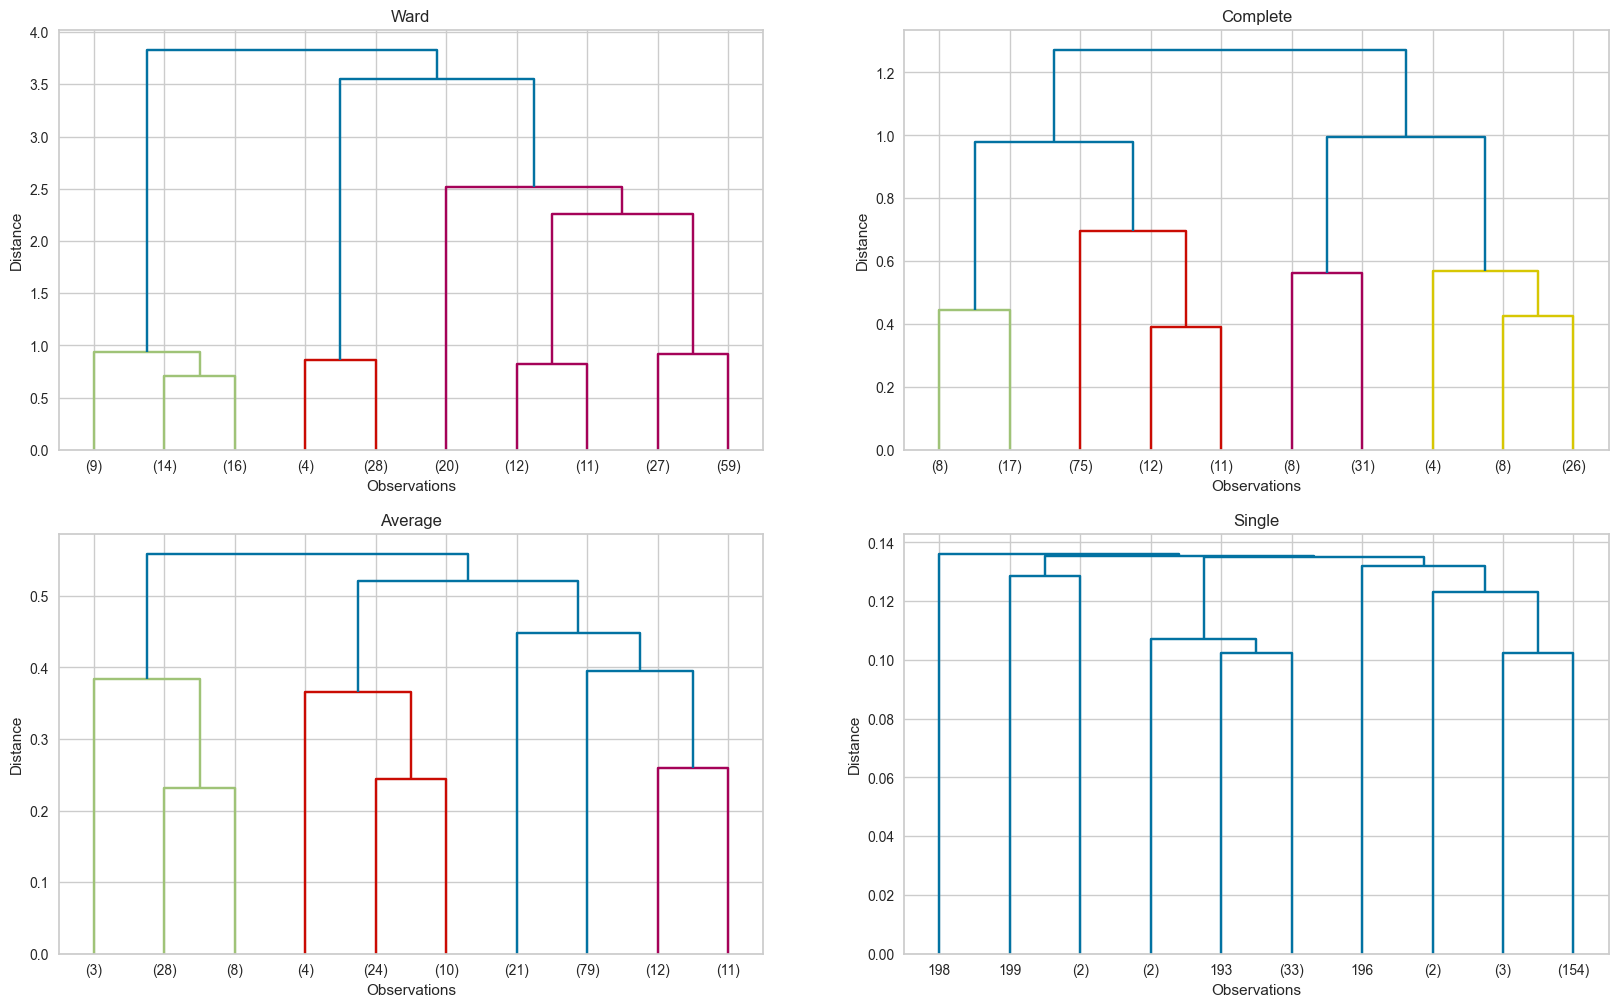

In [569]:
# dendograma vermek üzere datamızı ve mesafelerin neye göre ölçüleceği bilgisini linkage fonksiyonuna veriyoruz.
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

# truncate_mode='lastp' ve p=10 ayarlanarak dendogramın sadece son 10 kümeyi bize gösterecek şekilde sadeleştirme yapması
# sağlanır.
# range lere bakinca ward secilmeli
# 3 kume icin, 1 birim.
# 5 kume icin 2.3 - 0.9 = 1.4. optimal 5 gozukuyor.

### S(Silhouette) Score

In [ ]:
from sklearn.metrics import silhouette_score

In [574]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X3)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X3, model.labels_)}')

# dendograma benzer sekilde optimal 5 cluster gosteriyor.
# burada hesaplanan silhouette score bütün gözlemlerin ortalamasıdır (clusterlara göre)

Silhouette Score for 2 clusters: 0.39090074716611595
Silhouette Score for 3 clusters: 0.44796167261691394
Silhouette Score for 4 clusters: 0.4976418539903167
Silhouette Score for 5 clusters: 0.5582698727196419
Silhouette Score for 6 clusters: 0.5296670434232814
Silhouette Score for 7 clusters: 0.409308025869031
Silhouette Score for 8 clusters: 0.41055127971395405
Silhouette Score for 9 clusters: 0.4177210331066167


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [575]:
model3 = AgglomerativeClustering(n_clusters=3, 
                                 affinity="euclidean",
                                 linkage="ward")
model3.fit_predict(X2)

array([1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2])

#### Annual Income and Spending Score- x2

In [577]:
model5 = AgglomerativeClustering(n_clusters=5, 
                                 affinity="euclidean",
                                 linkage="ward")
model5.fit_predict(X3)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

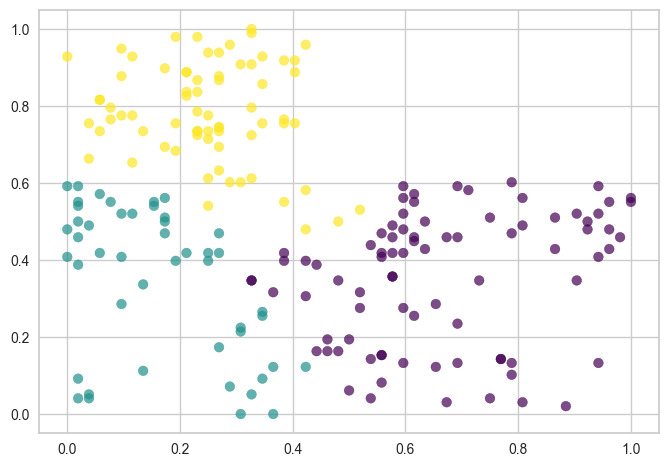

In [576]:
# n_cluster=3'e göre modeli yeniden kuruyoruz.
plt.scatter(X2["age"], 
            X2["score"],
            c=model3.labels_,
            cmap="viridis",
            alpha=0.7);

#### Annual Income and Spending Score- x2

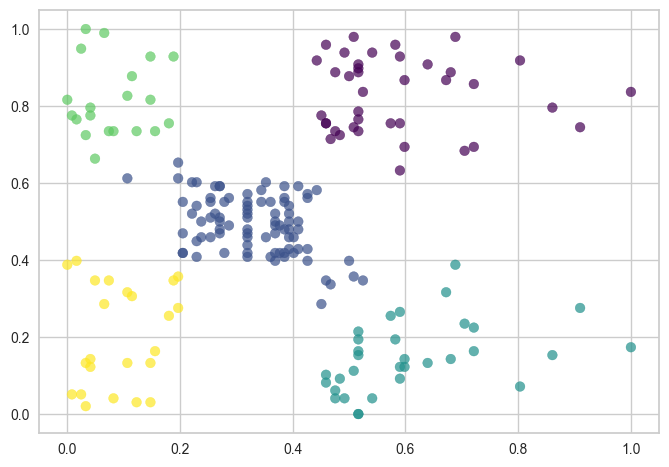

In [578]:
# n_cluster=5'e göre modeli yeniden kuruyoruz.
plt.scatter(X3["income"], 
            X3["score"],
            c=model5.labels_,
            cmap="viridis",
            alpha=0.7);

#### Interpretation based on Age and Spending Score- x1

In [654]:
X2.head()

,age,score
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959


In [656]:
X2_final = df0.copy()
X2_final.head()

,id,gender,age,income,score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [657]:
# I selected k-means for age and spending X2
if 'clusters' in X2.columns:
    X2.drop(columns=['clusters'], inplace=True)
final_model = KMeans(n_clusters=3, random_state=42)  
clusters = final_model.fit_predict(X2)
clusters

array([2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [658]:
X2_final['clusters'] = clusters
X2_final

,id,gender,age,income,score,clusters
0,1,0,19,15,39,2
1,2,0,21,15,81,0
2,3,1,20,16,6,2
3,4,1,23,16,77,0
4,5,1,31,17,40,2
...,...,...,...,...,...,...
195,196,1,35,120,79,0
196,197,1,45,126,28,2
197,198,0,32,126,74,0
198,199,0,32,137,18,2


In [666]:
X2_final.groupby('clusters')[['age','score']].mean()

,age,score
clusters,,
0,28.694118,73.482353
1,56.080645,40.306452
2,34.981132,24.433962


In [668]:
X2_final['labels'] = X2_final['clusters'].map({0:'young_affluents',1:'aging_middle_classs',2:'struggling_middle_agers'})
X2_final.head()

,id,gender,age,income,score,clusters,labels
0,1,0,19,15,39,2,struggling_middle_agers
1,2,0,21,15,81,0,young_affluents
2,3,1,20,16,6,2,struggling_middle_agers
3,4,1,23,16,77,0,young_affluents
4,5,1,31,17,40,2,struggling_middle_agers


In [680]:
X2_final.loc[:,['age','income','score','clusters']].groupby('clusters').mean()

,age,income,score
clusters,,,
0,28.694118,61.882353,73.482353
1,56.080645,54.354839,40.306452
2,34.981132,65.698113,24.433962


### Conclusion

Based on the characteristics of the clusters and considering the studies and literature on the topic, we can give them the following label names:

Cluster 0: Young Affluents
Cluster 1: Aging Middle Class
Cluster 2: Struggling Middle Agers

The label "Young Affluents" for Cluster 0 is consistent with previous research that has identified a similar segment of young consumers with high incomes who are interested in luxury and high-end products. This group may be interested in high-quality and trendy items and may have disposable income to spend on these items.

The label "Aging Middle Class" for Cluster 1 is consistent with previous research that has identified a similar group of older consumers with middle-class incomes who are more budget-conscious and focused on finding deals and discounts. This group may be more interested in practical and functional items, rather than luxury products.

The label "Struggling Middle Agers" for Cluster 2 is also consistent with previous research that has identified a similar segment of middle-aged consumers who are struggling with financial constraints. This group may be more price-sensitive and may be more likely to seek out bargains and value-oriented products.

Cluster 0 consists of younger customers with a mean age of 28.69, who have a relatively high income of 61.88 and a high spending score of 73.48. This suggests that these customers are likely to be younger professionals or students who are willing to spend money on shopping for products that they consider important or trendy. This segment may be targeted with marketing strategies that focus on trends and new products.

Cluster 1 consists of older customers with a mean age of 56.08, who have a relatively low income of 54.35 and a low spending score of 40.31. This segment may represent retirees or older individuals who are less interested in shopping and have less disposable income. They may be targeted with marketing strategies that offer discounts or deals on basic necessities.

Cluster 2 consists of customers with a mean age of 34.98, who have a relatively high income of 65.70 but a low spending score of 24.43. This suggests that these customers are more cautious with their spending and may be more interested in saving for larger purchases, such as a house or a car. This segment may be targeted with marketing strategies that focus on messaging that emphasizes the benefits of careful spending and saving for the future may resonate well with this group. Examples are bulk items or subscription services that offer savings over time, or loyalty programs that reward customers for their continued patronage.

#### Interpretation based on Annual Income and Spending Score- x2

In [672]:
X3.head()

,income,score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [674]:
X3_final = df0.copy()
X3_final.head()

,id,gender,age,income,score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [676]:
# We decided 5 clusters baased on annual income and spending score
if 'clusters' in X3.columns:
    X3.drop(columns=['clusters'], inplace = True)
if 'labels' in X3.columns:
    X3.drop(columns=['labels'], inplace = True)
final_model = AgglomerativeClustering(n_clusters=5, 
                                 affinity="euclidean",
                                 linkage="ward")

clusters = final_model.fit_predict(X3)
X3_final['clusters'] = clusters
X3_final.head()


,id,gender,age,income,score,clusters
0,1,0,19,15,39,4
1,2,0,21,15,81,3
2,3,1,20,16,6,4
3,4,1,23,16,77,3
4,5,1,31,17,40,4


In [677]:
X3_final.groupby('clusters').mean()
# 0 high_end_spenders 
# 1 mainstream_spenders
# 2 careful_spenders
# 3 impulsive_spenders 
# 4 budget_spenders

,id,gender,age,income,score
clusters,,,,,
0,162.000000,0.538462,32.692308,86.538462,82.128205
1,87.197674,0.593023,42.395349,55.488372,49.267442
2,166.250000,0.437500,41.000000,89.406250,15.593750
3,21.700000,0.600000,24.850000,24.950000,81.000000
4,23.000000,0.608696,45.217391,26.304348,20.913043


In [670]:
X3_final.groupby('clusters')[['income','score']].mean()

,income,score
clusters,,
0,86.538462,82.128205
1,55.488372,49.267442
2,89.406250,15.593750
3,24.950000,81.000000
4,26.304348,20.913043


In [671]:
X3_final['labels'] = X3_final['clusters'].map({2:'careful_spenders',0:'high_end_spenders',1:'mainstream_spenders',3:'impulsive_spenders',4:'budget_spenders'})
X3_final.labels

0         budget_spenders
1      impulsive_spenders
2         budget_spenders
3      impulsive_spenders
4         budget_spenders
              ...        
195     high_end_spenders
196      careful_spenders
197     high_end_spenders
198      careful_spenders
199     high_end_spenders
Name: labels, Length: 200, dtype: object

In [679]:
X3_final.loc[:,['age','income','score','clusters']].groupby('clusters').mean()

,age,income,score
clusters,,,
0,32.692308,86.538462,82.128205
1,42.395349,55.488372,49.267442
2,41.000000,89.406250,15.593750
3,24.850000,24.950000,81.000000
4,45.217391,26.304348,20.913043


### Conclusion

As seen , both in K Means algotihm and agglomerative hierarchical algorithm, the models with 5 clusters performed better in terms of maximum inter cluster distance and minimum intracluster distance measures. When we check the related scatter plots and boxplots, we can see that the clusters are better separated according to the annual income and spending scores of the customers.

Based on this result, when we do a research for the customer segmentation in the real world practices, we can label our 5 clusters as follow: 

Cluster 0: High-Income and High-Spending Customers

Cluster 1: Middle-Income and Moderate-Spending Customers

Cluster 2: High-Income and Low-Spending Customers

Cluster 3: Low-Income and High-Spending Customers

Cluster 4: Low-Income and Low-Spending Customers

The label "High-Income and High-Spending Customers" for Cluster 0 is consistent with research that has identified a similar segment of customers who have high incomes and also spend a lot of money on shopping. These customers may be more likely to purchase luxury items and high-end products.

The label "Middle-Income and Moderate-Spending Customers" for Cluster 1 is consistent with research that has identified a similar segment of customers who have average incomes and spend money moderately on shopping. These customers may be more budget-conscious and value-oriented, and may prioritize practicality over luxury.

The label "High-Income and Low-Spending Customers" for Cluster 2 is consistent with research that has identified a segment of customers who have high incomes but do not spend as much on shopping. These customers may be more frugal and may prioritize saving over spending.

The label "Low-Income and High-Spending Customers" for Cluster 3 is consistent with research that has identified a similar segment of customers who have low incomes but spend a lot of money on shopping. These customers may be more likely to use credit cards or other forms of financing to fund their shopping habits.

The label "Low-Income and Low-Spending Customers" for Cluster 4 is consistent with research that has identified a segment of customers who have low incomes and do not spend a lot on shopping. These customers may be more budget-conscious and may prioritize saving money for essential expenses.

These label names effectively communicate the key characteristics of each cluster and are intuitive and easy to understand.

Based on the cluster analysis, we can make the following comments about each group:

Cluster 0, with the highest income and spending score, could represent the "high spenders" or "affluent customers" segment, who are willing to spend more money on shopping. They are likely to be younger, around 32 years old, and potentially belong to a high-income bracket. Retailers can target this segment with high-end products, exclusive deals, and luxury experiences to keep them engaged.

Cluster 1, with moderate income and spending score, may represent the "value seekers" or "budget-conscious" segment. They are slightly older, around 42 years old, and may have a middle-class income. Retailers can target this segment by offering discounts, promotions, and rewards to keep them loyal to their brand.

Cluster 2, with high income but low spending score, may represent the "savvy shoppers" or "price-sensitive" segment. They are around 41 years old and belong to a high-income bracket. Retailers can target this segment by offering high-quality products at reasonable prices, emphasizing value and convenience.

Cluster 3, with low income but high spending score, may represent the "young and reckless" or "impulsive" segment. They are around 24 years old and have a low-income level. Retailers can target this segment by offering affordable yet trendy and fashionable products to keep them engaged.

Cluster 4, with the lowest income and spending score, may represent the "bargain hunters" or "economical" segment. They are older, around 45 years old, and belong to a low-income bracket. Retailers can target this segment by offering discounts, promotions, and value products.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___